## Importing Packages

In [8]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Loading and Transforming Data

In [2]:
# Importing the Data
file_name = Path('./Data/Index2018.csv')
df = pd.read_csv(file_name, parse_dates=True, index_col='date', infer_datetime_format=True, dayfirst=True) 
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
df = df.fillna(method='ffill')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## S&P500 Data Only

In [5]:
# SPX data
spx_data = df['spx'].to_frame()

# Train and Test Split
train_size = int(len(spx_data)*0.8)
train_spx = spx_data.iloc[:train_size]
test_spx = spx_data.iloc[train_size:]

## White Noise

In [6]:
wn_data = np.random.normal(loc=train_spx.mean(), scale=train_spx.std(), size=len(train_spx))
train_spx['wn'] = wn_data

## Random Walk

In [7]:
rw_data = pd.read_csv(Path('./Data/RandWalk.csv'), parse_dates=True, infer_datetime_format=True, index_col='date', dayfirst=True)
rw_data = rw_data.asfreq('b')
train_spx['rw'] = rw_data

# Seasonality

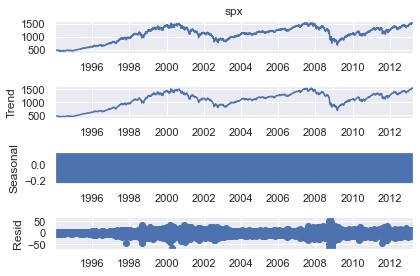

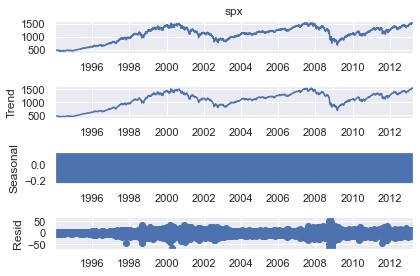

In [18]:
# Additive method
seasonal_dec_additive = seasonal_decompose(train_spx['spx'], model="additive")
seasonal_dec_additive.plot()

Observations

1. Trend plot more similar to actual time series since it uses previous period values as a trend-setter. This part explain variablility of the data
2. Seasonal plot values are constantly ocillating back and forth between -0.2 and 0.0. So there is NO CYCLICAL PATTERN can be found using this model
3. Residual plot can see around 2000 and 2008 have more residulas because of dot.com crash and real estate crash respectively

So, using Additive model, we could not find any Seasonality in the spx data

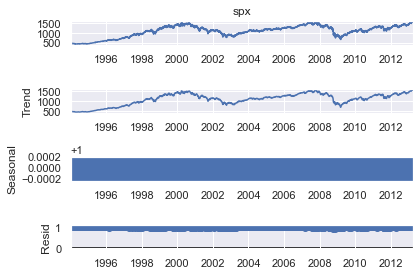

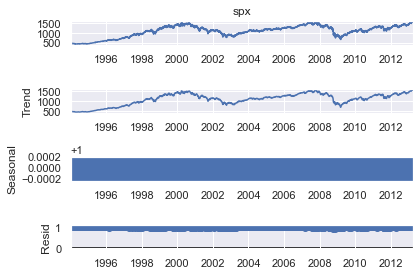

In [25]:
# Multiplicative method
seasonal_dec_multiplicative = seasonal_decompose(train_spx['spx'], model="multiplicative")
seasonal_dec_multiplicative.plot()

Observations

Same like Additive model, NO SEASONAL PATTERN in SPX data

Summary

Since trend follows a close pattern to Actual data, we can further exploer its correlation between past and present values